In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


<AxesSubplot:>

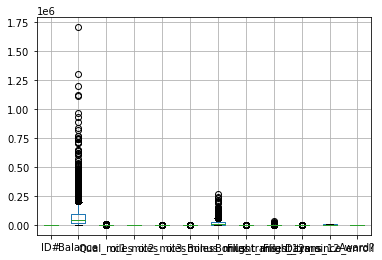

In [6]:
df.boxplot()

In [11]:
df.drop(['Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?'],axis=1,inplace=True)

In [12]:
df.head()

,ID#,Balance,Bonus_miles,Days_since_enroll
0,1,28143,174,7000
1,2,19244,215,6968
2,3,41354,4123,7034
3,4,14776,500,6952
4,5,97752,43300,6935


In [14]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_df = scaler.fit_transform(df.iloc[:,1:])

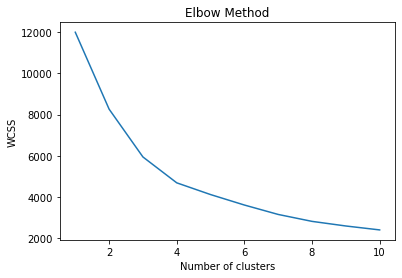

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df_df)

KMeans(n_clusters=4, random_state=42)

In [18]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [19]:
df['clusterid_new'] = clusters_new.labels_

In [20]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.13075017, -0.32424971,  0.82204958],
       [ 0.50180901,  1.66483407,  0.38191645],
       [-0.31580197, -0.38677469, -0.8948616 ],
       [ 4.45042265,  1.43425867,  0.99336246]])

In [21]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Bonus_miles,Days_since_enroll
,,mean,mean,mean,mean
0,0,1052.093131,60426.539630,9314.881110,5815.990092
1,1,1564.048465,124165.140549,57347.172859,4907.169628
2,2,3058.406569,41780.153454,7805.031144,2270.780861
3,3,951.020000,522039.550000,51779.250000,6169.730000


In [22]:
df

,ID#,Balance,Bonus_miles,Days_since_enroll,clusterid_new
0,1,28143,174,7000,0
1,2,19244,215,6968,0
2,3,41354,4123,7034,0
3,4,14776,500,6952,0
4,5,97752,43300,6935,1
...,...,...,...,...,...
3994,4017,18476,8525,1403,2
3995,4018,64385,981,1395,2
3996,4019,73597,25447,1402,2
3997,4020,54899,500,1401,2


# Inference

In [ ]:
with the help of kmeans(elbow method) we find the optimum num of clusters